In [26]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [27]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('diabetes.csv',header=1, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  767 non-null    int64  
 1   glucose   767 non-null    int64  
 2   bp        767 non-null    int64  
 3   skin      767 non-null    int64  
 4   insulin   767 non-null    int64  
 5   bmi       767 non-null    float64
 6   pedigree  767 non-null    float64
 7   age       767 non-null    int64  
 8   label     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
feature_cols = ['pregnant', 'glucose', 'bp', 'insulin', 'bmi', 'pedigree', 'age',]
X = df[feature_cols]
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [30]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7316017316017316


In [31]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree
# plt.figure(figsize=(25,10))
# a = plot_tree(clf, feature_names=X.columns.tolist(), class_names=y.tolist(), filled=True, rounded=True, fontsize=14)
# plt.show()

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score

In [33]:
df = pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [34]:
X = df.drop('heart disease',axis=1)
y = df['heart disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [35]:
logit = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=7)

voting = VotingClassifier(estimators=[('lr', logit), ('dt', dt), ('knn', knn)], voting='hard')

In [36]:
list_of_classifiers = [logit, dt, knn, voting]
for clf in list_of_classifiers:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(f"F1_score: {clf.__class__.__name__}, {f1_score(y_test, pred)}")
    print(f"Accuracy: {clf.__class__.__name__}, {accuracy_score(y_test, pred)}")

F1_score: LogisticRegression, 0.5625
Accuracy: LogisticRegression, 0.654320987654321
F1_score: DecisionTreeClassifier, 0.6
Accuracy: DecisionTreeClassifier, 0.654320987654321
F1_score: KNeighborsClassifier, 0.5294117647058824
Accuracy: KNeighborsClassifier, 0.6049382716049383
F1_score: VotingClassifier, 0.625
Accuracy: VotingClassifier, 0.7037037037037037


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [39]:
X = df.drop('heart disease',axis=1)
y = df['heart disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100,
oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [41]:
classifier_rf.oob_score_

0.656084656084656

In [42]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
'max_depth': [2,3,5,10,20],
'min_samples_leaf': [5,10,20,50,100,200],
'n_estimators': [10,25,30,50,100,200]
}

In [43]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4,
n_jobs=-1, verbose=1, scoring="accuracy")


In [44]:
%%time
grid_search.fit(X_train, y_train)
grid_search.best_score_

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 1.53 s
Wall time: 24.9 s


np.float64(0.6985815602836879)

In [45]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [46]:
y_pred = rf_best.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.6296296296296297


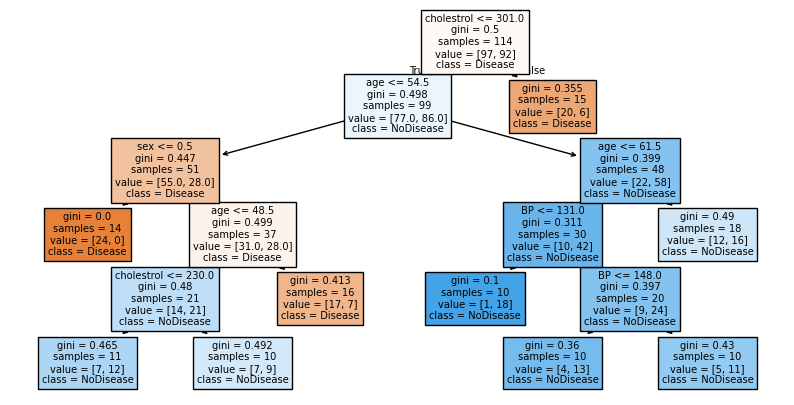

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(rf_best.estimators_[5], feature_names = X.columns.tolist(), class_names=['Disease', "NoDisease"],filled=True)
plt.show()

[Text(0.4375, 0.9, 'age <= 54.5\ngini = 0.496\nsamples = 122\nvalue = [103, 86]\nclass = Disease'),
 Text(0.1875, 0.7, 'sex <= 0.5\ngini = 0.395\nsamples = 55\nvalue = [62, 23]\nclass = Disease'),
 Text(0.3125, 0.8, 'True  '),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [19, 0]\nclass = Disease'),
 Text(0.25, 0.5, 'BP <= 127.0\ngini = 0.454\nsamples = 42\nvalue = [43, 23]\nclass = Disease'),
 Text(0.125, 0.3, 'BP <= 115.0\ngini = 0.49\nsamples = 20\nvalue = [16, 12]\nclass = Disease'),
 Text(0.0625, 0.1, 'gini = 0.49\nsamples = 10\nvalue = [8, 6]\nclass = Disease'),
 Text(0.1875, 0.1, 'gini = 0.49\nsamples = 10\nvalue = [8, 6]\nclass = Disease'),
 Text(0.375, 0.3, 'cholestrol <= 243.5\ngini = 0.411\nsamples = 22\nvalue = [27, 11]\nclass = Disease'),
 Text(0.3125, 0.1, 'gini = 0.48\nsamples = 12\nvalue = [12, 8]\nclass = Disease'),
 Text(0.4375, 0.1, 'gini = 0.278\nsamples = 10\nvalue = [15, 3]\nclass = Disease'),
 Text(0.6875, 0.7, 'sex <= 0.5\ngini = 0.478\nsamples = 67\nvalu

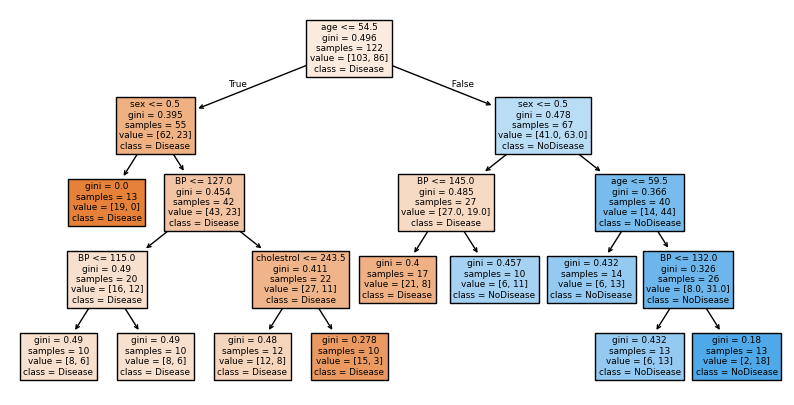

In [49]:
plt.figure(figsize=(10,5))
plot_tree(rf_best.estimators_[7], feature_names = X.columns.tolist(), class_names=['Disease', "NoDisease"],filled=True)

In [51]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746
